## Assignment 1: Charts and plots
## COSC 6344 Visualization
### Raunak Sarbajna
### 1956665

In [144]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import numpy as np
sn.set(font_scale=1)

from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame

from mpl_toolkits.basemap import Basemap

In [3]:
tit_data = pd.read_csv("titanic_data.csv")
tit_data["Embarked"].replace({"S": "Southampton", "C": "Cherbourg", "Q": "Queenstown"}, inplace=True)
tit_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


Text(0.5, 21.92, 'Passenger Class')

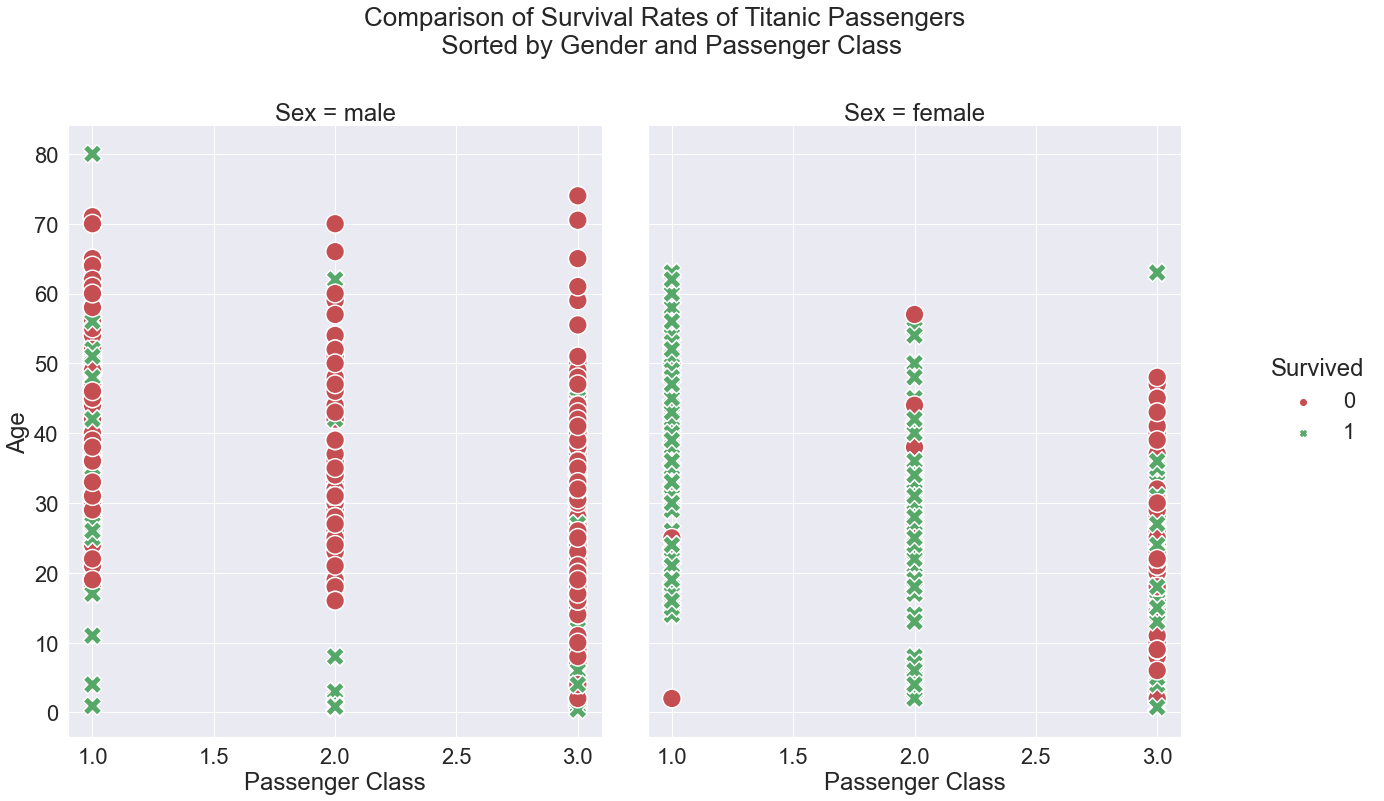

In [75]:

pl = sn.relplot(
    data=tit_data, x="Pclass", y="Age",
    col="Sex", hue="Survived", style="Survived",
    kind="scatter",
    palette=["r", "g"], s=350
)
pl.fig.set_size_inches(20, 12)
pl.fig.suptitle("Comparison of Survival Rates of Titanic Passengers \n Sorted by Gender and Passenger Class",
               fontsize=26, fontdict={"weight": "bold"}, 
                y=1)
pl.axes[0,0].set_xlabel('Passenger Class')
pl.axes[0,1].set_xlabel('Passenger Class')
# plt.xlabel("Height")
# pl.fig.supylabel("Passenger Class")
# plt.title("Comparison of Survival Rates of Titanic Passengers \n Sorted by Gender and Passenger Class")

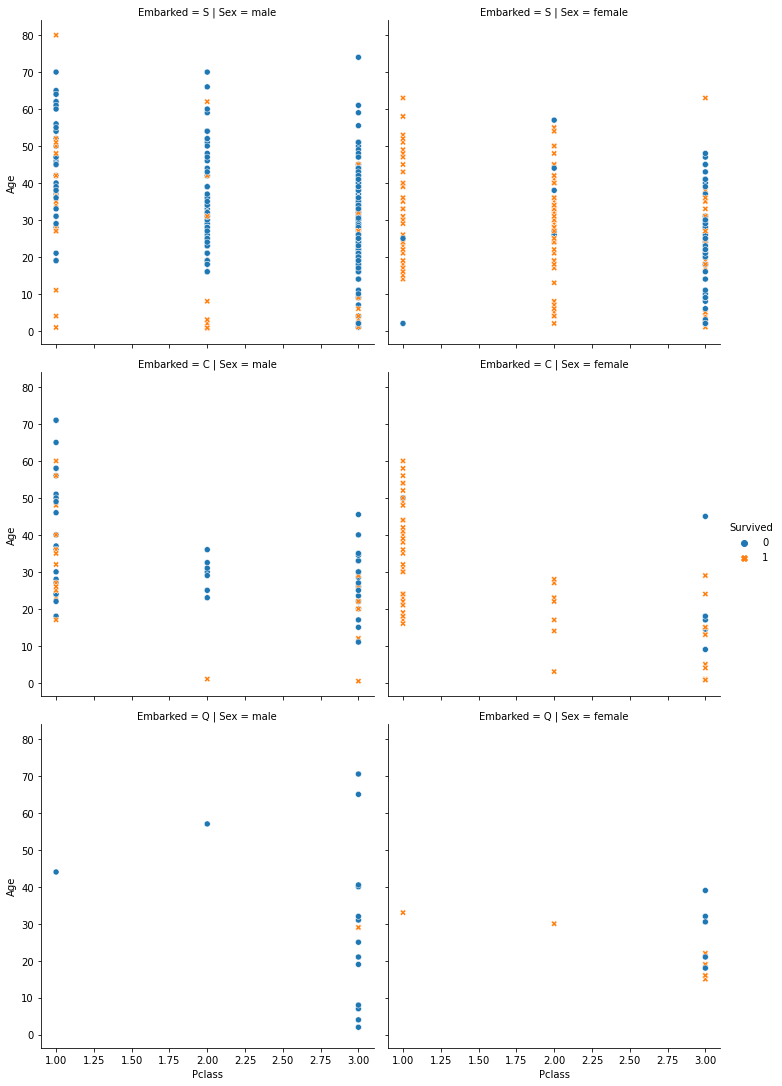

In [13]:
sn.relplot(
    data=tit_data, x="Pclass", y="Age",
    col="Sex", row = "Embarked",
    hue="Survived", style="Survived",
    kind="scatter"
)

Text(0.5, 8.959999999999944, 'Passenger Class')

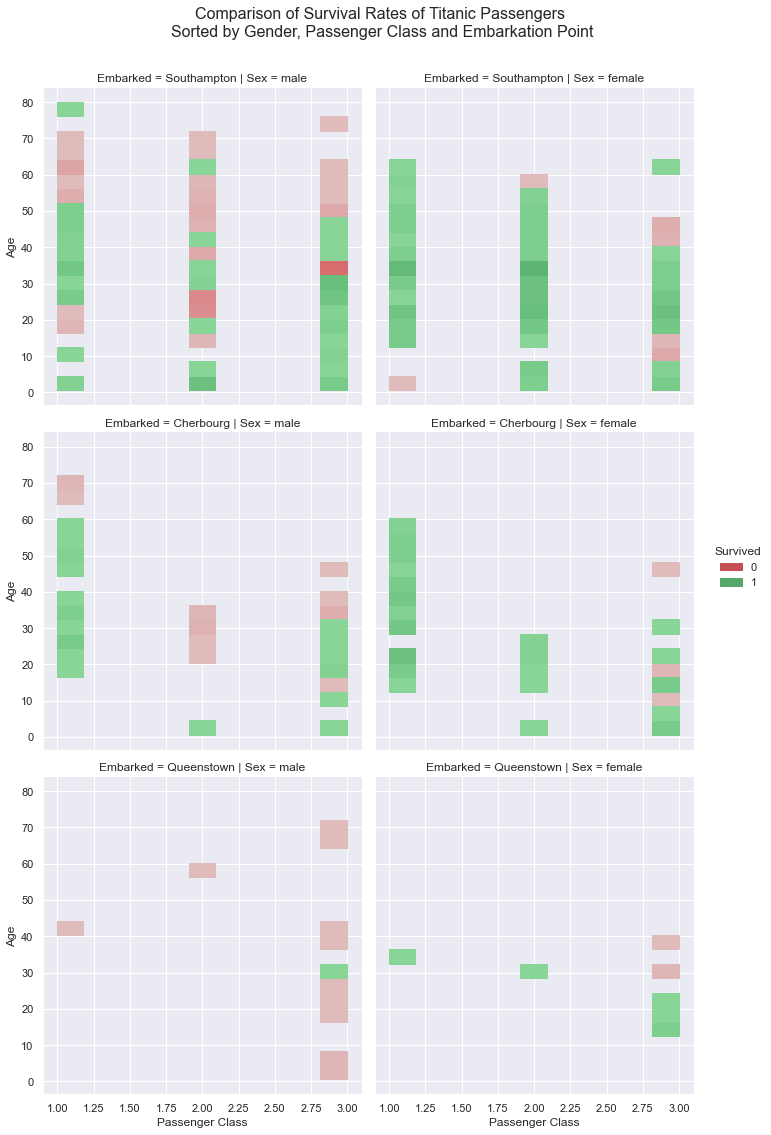

In [78]:
sn.set(font_scale=1)
p2 = sn.displot(
    data=tit_data, x="Pclass", y="Age",
    col="Sex", row = "Embarked",
    hue="Survived", kind="hist",
    palette=["r", "g"],
#     multiple="dodge"
)

# p2.fig.set_size_inches(28.5, 20.5)
p2.fig.suptitle("Comparison of Survival Rates of Titanic Passengers \n"+ 
                "Sorted by Gender, Passenger Class and Embarkation Point",
                fontsize=16, fontdict={"weight": "bold"}, 
                y=1.05)
p2.axes[2,0].set_xlabel('Passenger Class')
p2.axes[2,1].set_xlabel('Passenger Class')

In [79]:
hou_co = pd.read_csv("Houston_Woodland_CO_2018.csv")
hou_oz = pd.read_csv("Houston_Woodland_Ozone_2018.csv")
hou_pm = pd.read_csv("Houston_Woodland_PM2.5_2018.csv")


In [80]:
hou_co

,Date,AQS_SITE_ID,POC,Daily Max 8-hour CO Concentration,UNITS,DAILY_AQI_VALUE,DAILY_OBS_COUNT,PERCENT_COMPLETE,AQS_PARAMETER_CODE,AQS_PARAMETER_DESC,CBSA_CODE,CBSA_NAME,STATE_CODE,STATE,COUNTY_CODE,COUNTY,SITE_LATITUDE,SITE_LONGITUDE
0,01/01/2018,482011035,1,0.2,ppm,2,19,79.0,42101,Carbon monoxide,26420,"Houston-The Woodlands-Sugar Land, TX",48,Texas,201,Harris,29.733726,-95.257593
1,01/02/2018,482011035,1,0.2,ppm,2,24,100.0,42101,Carbon monoxide,26420,"Houston-The Woodlands-Sugar Land, TX",48,Texas,201,Harris,29.733726,-95.257593
2,01/03/2018,482011035,1,0.7,ppm,8,24,100.0,42101,Carbon monoxide,26420,"Houston-The Woodlands-Sugar Land, TX",48,Texas,201,Harris,29.733726,-95.257593
3,01/04/2018,482011035,1,1.2,ppm,14,24,100.0,42101,Carbon monoxide,26420,"Houston-The Woodlands-Sugar Land, TX",48,Texas,201,Harris,29.733726,-95.257593
4,01/05/2018,482011035,1,0.6,ppm,7,24,100.0,42101,Carbon monoxide,26420,"Houston-The Woodlands-Sugar Land, TX",48,Texas,201,Harris,29.733726,-95.257593
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268,03/28/2018,482011052,1,0.8,ppm,9,24,100.0,42101,Carbon monoxide,26420,"Houston-The Woodlands-Sugar Land, TX",48,Texas,201,Harris,29.814530,-95.387690
269,03/29/2018,482011052,1,0.8,ppm,9,24,100.0,42101,Carbon monoxide,26420,"Houston-The Woodlands-Sugar Land, TX",48,Texas,201,Harris,29.814530,-95.387690
270,03/30/2018,482011052,1,0.7,ppm,8,24,100.0,42101,Carbon monoxide,26420,"Houston-The Woodlands-Sugar Land, TX",48,Texas,201,Harris,29.814530,-95.387690
271,03/31/2018,482011052,1,0.9,ppm,10,24,100.0,42101,Carbon monoxide,26420,"Houston-The Woodlands-Sugar Land, TX",48,Texas,201,Harris,29.814530,-95.387690


In [81]:
hou_oz

,Date,AQS_SITE_ID,POC,Daily Max 8-hour Ozone Concentration,UNITS,DAILY_AQI_VALUE,DAILY_OBS_COUNT,PERCENT_COMPLETE,AQS_PARAMETER_CODE,AQS_PARAMETER_DESC,CBSA_CODE,CBSA_NAME,STATE_CODE,STATE,COUNTY_CODE,COUNTY,SITE_LATITUDE,SITE_LONGITUDE
0,01/01/2018,480391004,1,0.035,ppm,32,17,100.0,44201,Ozone,26420,"Houston-The Woodlands-Sugar Land, TX",48,Texas,39,Brazoria,29.520443,-95.392509
1,01/02/2018,480391004,1,0.027,ppm,25,17,100.0,44201,Ozone,26420,"Houston-The Woodlands-Sugar Land, TX",48,Texas,39,Brazoria,29.520443,-95.392509
2,01/03/2018,480391004,1,0.032,ppm,30,17,100.0,44201,Ozone,26420,"Houston-The Woodlands-Sugar Land, TX",48,Texas,39,Brazoria,29.520443,-95.392509
3,01/04/2018,480391004,1,0.029,ppm,27,17,100.0,44201,Ozone,26420,"Houston-The Woodlands-Sugar Land, TX",48,Texas,39,Brazoria,29.520443,-95.392509
4,01/05/2018,480391004,1,0.036,ppm,33,17,100.0,44201,Ozone,26420,"Houston-The Woodlands-Sugar Land, TX",48,Texas,39,Brazoria,29.520443,-95.392509
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1737,03/26/2018,483390078,1,0.050,ppm,46,17,100.0,44201,Ozone,26420,"Houston-The Woodlands-Sugar Land, TX",48,Texas,339,Montgomery,30.350302,-95.425128
1738,03/27/2018,483390078,1,0.049,ppm,45,17,100.0,44201,Ozone,26420,"Houston-The Woodlands-Sugar Land, TX",48,Texas,339,Montgomery,30.350302,-95.425128
1739,03/28/2018,483390078,1,0.035,ppm,32,17,100.0,44201,Ozone,26420,"Houston-The Woodlands-Sugar Land, TX",48,Texas,339,Montgomery,30.350302,-95.425128
1740,03/29/2018,483390078,1,0.056,ppm,54,17,100.0,44201,Ozone,26420,"Houston-The Woodlands-Sugar Land, TX",48,Texas,339,Montgomery,30.350302,-95.425128


In [82]:
hou_pm

,Date,AQS_SITE_ID,POC,Daily Mean PM2.5 Concentration,UNITS,DAILY_AQI_VALUE,DAILY_OBS_COUNT,PERCENT_COMPLETE,AQS_PARAMETER_CODE,AQS_PARAMETER_DESC,CBSA_CODE,CBSA_NAME,STATE_CODE,STATE,COUNTY_CODE,COUNTY,SITE_LATITUDE,SITE_LONGITUDE
0,01/02/2018,481671034,1,4.7,ug/m3 LC,20,1,100.0,88101,PM2.5 - Local Conditions,26420,"Houston-The Woodlands-Sugar Land, TX",48,Texas,167,Galveston,29.254474,-94.861289
1,01/08/2018,481671034,1,7.1,ug/m3 LC,30,1,100.0,88101,PM2.5 - Local Conditions,26420,"Houston-The Woodlands-Sugar Land, TX",48,Texas,167,Galveston,29.254474,-94.861289
2,01/14/2018,481671034,1,3.4,ug/m3 LC,14,1,100.0,88101,PM2.5 - Local Conditions,26420,"Houston-The Woodlands-Sugar Land, TX",48,Texas,167,Galveston,29.254474,-94.861289
3,01/20/2018,481671034,1,4.6,ug/m3 LC,19,1,100.0,88101,PM2.5 - Local Conditions,26420,"Houston-The Woodlands-Sugar Land, TX",48,Texas,167,Galveston,29.254474,-94.861289
4,01/26/2018,481671034,1,6.4,ug/m3 LC,27,1,100.0,88101,PM2.5 - Local Conditions,26420,"Houston-The Woodlands-Sugar Land, TX",48,Texas,167,Galveston,29.254474,-94.861289
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
958,03/27/2018,483390078,3,13.7,ug/m3 LC,54,1,100.0,88502,Acceptable PM2.5 AQI & Speciation Mass,26420,"Houston-The Woodlands-Sugar Land, TX",48,Texas,339,Montgomery,30.350302,-95.425128
959,03/28/2018,483390078,3,6.3,ug/m3 LC,26,1,100.0,88502,Acceptable PM2.5 AQI & Speciation Mass,26420,"Houston-The Woodlands-Sugar Land, TX",48,Texas,339,Montgomery,30.350302,-95.425128
960,03/29/2018,483390078,3,5.2,ug/m3 LC,22,1,100.0,88502,Acceptable PM2.5 AQI & Speciation Mass,26420,"Houston-The Woodlands-Sugar Land, TX",48,Texas,339,Montgomery,30.350302,-95.425128
961,03/30/2018,483390078,3,7.9,ug/m3 LC,33,1,100.0,88502,Acceptable PM2.5 AQI & Speciation Mass,26420,"Houston-The Woodlands-Sugar Land, TX",48,Texas,339,Montgomery,30.350302,-95.425128


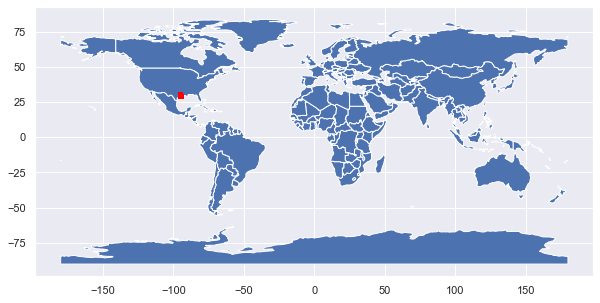

In [86]:
geometry = [Point(xy) for xy in zip(hou_pm['SITE_LONGITUDE'], hou_pm['SITE_LATITUDE'])]
gdf = GeoDataFrame(hou_pm, geometry=geometry)   

#this is a simple map that goes with geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf.plot(ax=world.plot(figsize=(10, 6)), marker='o', color='red', markersize=15);

Text(0.5, 1.05, 'Change in PM2.5 Concentration in the Houston Area \nAlong with Daily Air Quality Index values')

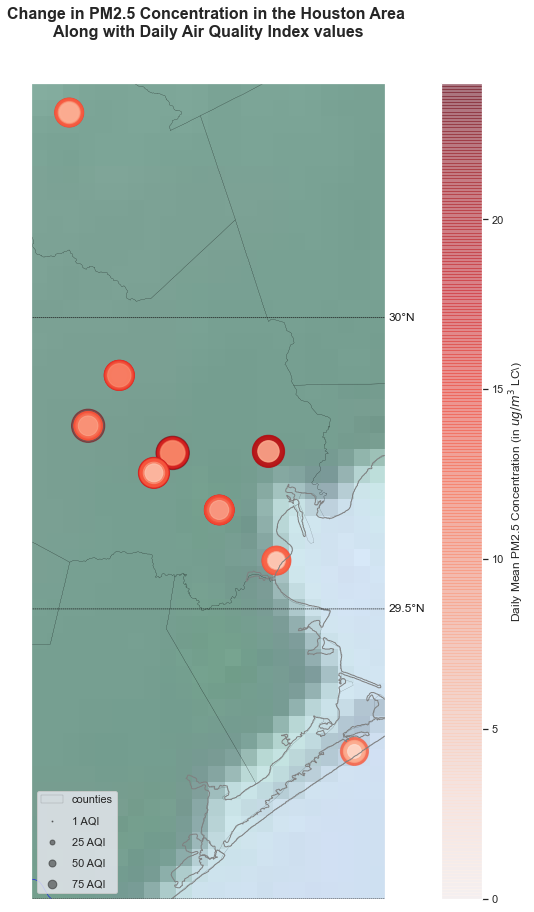

In [165]:
pm = hou_pm['Daily Mean PM2.5 Concentration'].to_list()
pm_long = hou_pm['SITE_LONGITUDE'].to_list()
pm_lat = hou_pm['SITE_LATITUDE'].to_list()
pm_aqi = hou_pm['DAILY_AQI_VALUE'].to_list()
pm_aqi_l = [15*x for x in pm_aqi]



fig = plt.figure(figsize=(20, 15))
m = Basemap(projection='merc', resolution='f',
            llcrnrlon= -95.5,llcrnrlat= 29.0,
            urcrnrlon= -94.8,urcrnrlat= 30.4)
m.shadedrelief()
m.drawcoastlines(color='gray')
m.drawcountries(color='gray')
m.drawstates(color='gray')
m.drawcounties(color='black')
m.drawrivers(color='blue')
parallels = np.arange(28.,31.,0.5)
m.drawparallels(parallels,labels=[False,True,True,False])
meridians = np.arange(-94.,-96.,0.5)
m.drawmeridians(meridians,labels=[True,False,False,True])

m.scatter(pm_long, pm_lat, latlon=True,
          c=pm, s= pm_aqi_l,
          cmap='Reds', alpha=0.5)


plt.colorbar(label=r'Daily Mean PM2.5 Concentration (in $ug/m^3$ LC\)')
plt.clim(0, 24)

for a in [1, 25, 50, 75]:
    plt.scatter([], [], c='k', alpha=0.5, s=a,
                label=str(a) + ' AQI')
plt.legend(scatterpoints=1, frameon=True,
           labelspacing=1, loc='lower left');
plt.title("Change in PM2.5 Concentration in the Houston Area \n"+ 
          "Along with Daily Air Quality Index values",
          fontsize=16, fontdict={"weight": "bold"},
          y=1.05)

In [162]:
print(max(pm), min(pm))
print(max(pm_aqi), min(pm_aqi))

23.7 0.2
75 1


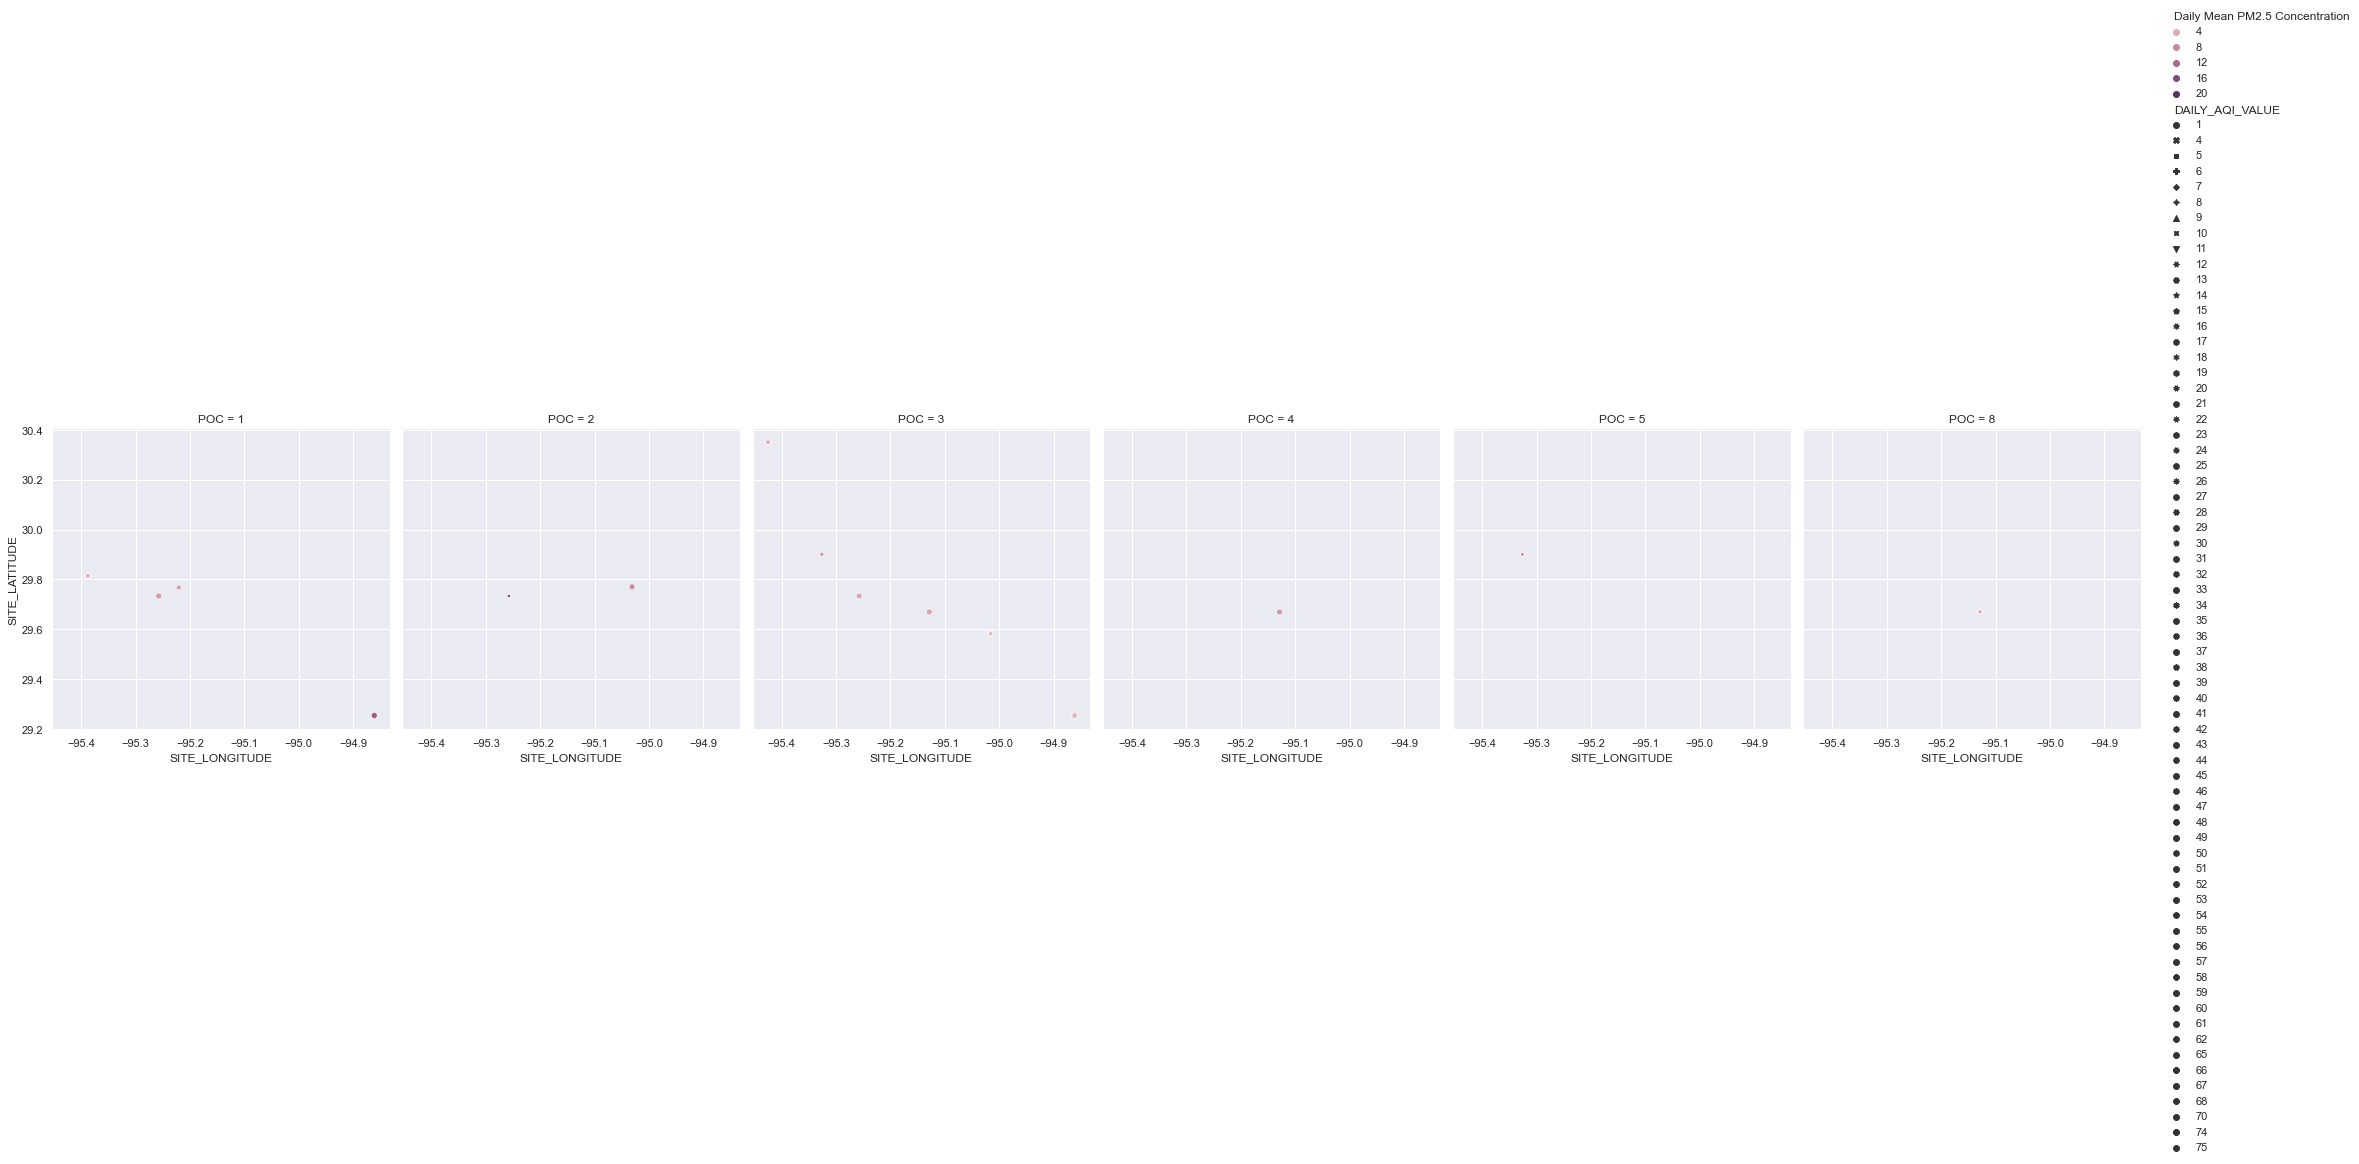

In [118]:
sn.relplot(
    data=hou_pm, x="SITE_LONGITUDE", y="SITE_LATITUDE",
    col="POC", hue="Daily Mean PM2.5 Concentration", style="DAILY_AQI_VALUE",
    kind="scatter",
#     palette=["r", "g"], s=350
)

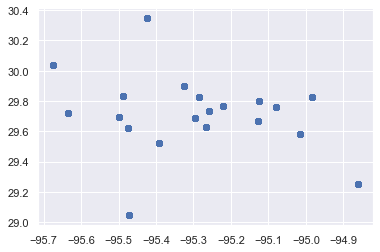

In [103]:
plt.scatter(x=hou_oz['SITE_LONGITUDE'], y=hou_oz['SITE_LATITUDE'])
plt.show()

Text(0.5, 1.05, 'Change in Ozone Concentration in the Houston Area \nAlong with Daily Air Quality Index values')

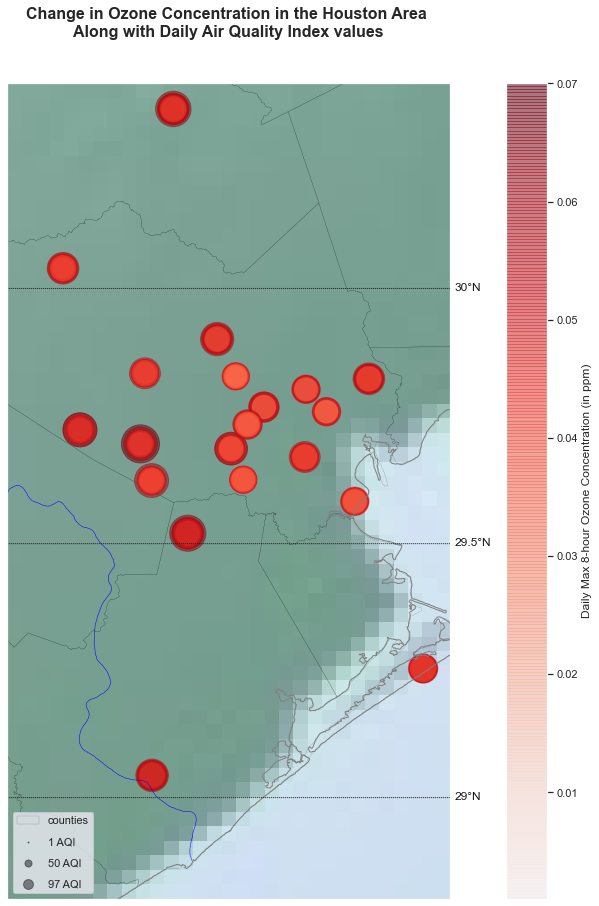

In [166]:
oz = hou_oz['Daily Max 8-hour Ozone Concentration'].to_list()
oz_long = hou_oz['SITE_LONGITUDE'].to_list()
oz_lat = hou_oz['SITE_LATITUDE'].to_list()
oz_aqi = hou_oz['DAILY_AQI_VALUE'].to_list()
oz_aqi_l = [15*x for x in oz_aqi]




fig = plt.figure(figsize=(20, 15))
m = Basemap(projection='merc', resolution='f',
            llcrnrlon= -95.8,llcrnrlat= 28.8,
            urcrnrlon= -94.8,urcrnrlat= 30.4)
m.shadedrelief()
m.drawcoastlines(color='gray')
m.drawcountries(color='gray')
m.drawstates(color='gray')
m.drawcounties(color='black')
m.drawrivers(color='blue')
parallels = np.arange(28.,31.,0.5)
m.drawparallels(parallels,labels=[False,True,True,False])
meridians = np.arange(-94.,-96.,0.5)
m.drawmeridians(meridians,labels=[True,False,False,True])


m.scatter(oz_long, oz_lat, latlon=True,
          c=oz, 
          s= oz_aqi_l,
          cmap='Reds', alpha=0.5)


plt.colorbar(label=r'Daily Max 8-hour Ozone Concentration (in ppm)')
plt.clim(0.001, 0.07)

for a in [1, 50, 97]:
    plt.scatter([], [], c='k', alpha=0.5, s=a,
                label=str(a) + ' AQI')
plt.legend(scatterpoints=1, frameon=True,
           labelspacing=1, loc='lower left');
plt.title("Change in Ozone Concentration in the Houston Area \n"+ 
          "Along with Daily Air Quality Index values",
          fontsize=16, fontdict={"weight": "bold"},
          y=1.05)

In [154]:
print(min(oz_aqi), max(oz_aqi))

1 97


In [124]:
print(max(oz), min(oz))

0.069 0.001


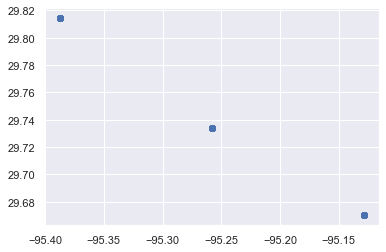

In [129]:
plt.scatter(x=hou_co['SITE_LONGITUDE'], y=hou_co['SITE_LATITUDE'])
plt.show()

Text(0.5, 1.05, 'Change in CO Concentration in the Houston Area \nAlong with Daily Air Quality Index values')

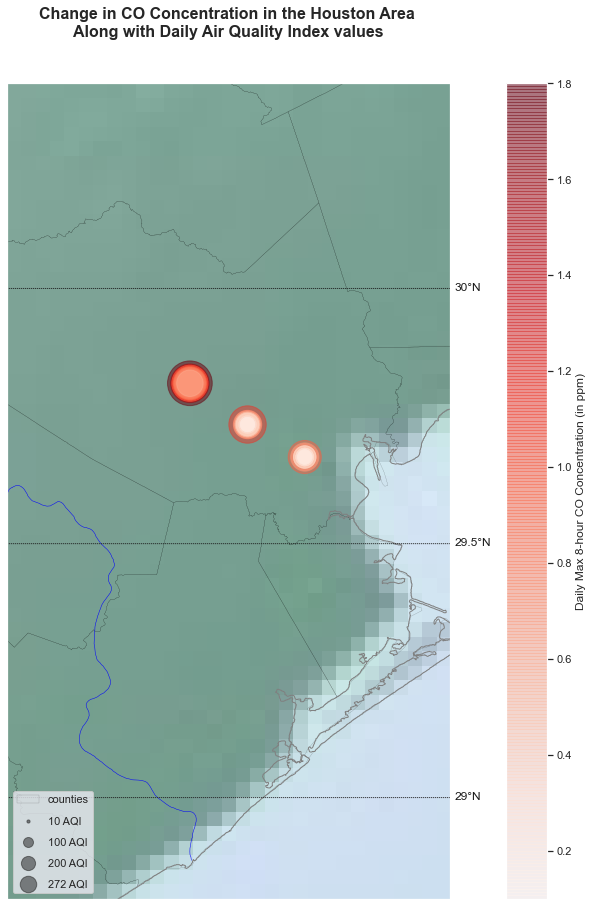

In [167]:
co = hou_co['Daily Max 8-hour CO Concentration'].to_list()
co_long = hou_co['SITE_LONGITUDE'].to_list()
co_lat = hou_co['SITE_LATITUDE'].to_list()
co_aqi = hou_co['DAILY_AQI_VALUE'].to_list()
co_aqi_l = [100*x for x in co_aqi]



fig = plt.figure(figsize=(20, 15))
m = Basemap(projection='merc', resolution='f',
            llcrnrlon= -95.8,llcrnrlat= 28.8,
            urcrnrlon= -94.8,urcrnrlat= 30.4)
m.shadedrelief()
m.drawcoastlines(color='gray')
m.drawcountries(color='gray')
m.drawstates(color='gray')
m.drawcounties(color='black')
m.drawrivers(color='blue')

# draw parallels and meridians.
# label parallels on right and top
# meridians on bottom and left
parallels = np.arange(28.,31.,0.5)
# labels = [left,right,top,bottom]
m.drawparallels(parallels,labels=[False,True,True,False])
meridians = np.arange(-94.,-96.,0.5)
m.drawmeridians(meridians,labels=[True,False,False,True])


m.scatter(co_long, co_lat, latlon=True,
          c=co, 
          s= co_aqi_l,
          cmap='Reds', alpha=0.5)


plt.colorbar(label=r'Daily Max 8-hour CO Concentration (in ppm)')
plt.clim(0.1, 1.8)


for a in [10, 100, 200, 272]:
    plt.scatter([], [], c='k', alpha=0.5, s=a,
                label=str(a) + ' AQI')
plt.legend(scatterpoints=1, frameon=True,
           labelspacing=1, loc='lower left');
plt.title("Change in CO Concentration in the Houston Area \n"+ 
          "Along with Daily Air Quality Index values",
          fontsize=16, fontdict={"weight": "bold"},
          y=1.05)

In [131]:
print(max(co), min(co))

1.8 0.1
